In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
Y = heart_disease.data.targets 

print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [ ]:
df = pd.merge(X, Y, left_index=True, right_index=True)
df.head()
df.info()
(df.isna().sum()/len(df))*100

In [ ]:
sns.boxplot(x='num',y='age',data=df)

Generally when people get older, the risk of haert disease gets higher and higher compared to younger individuals. Older adults might have a higher percentage of both heart disease patients and healthy individuals. An increase in the median age would indicate that older age groups tend to have higher rates of heart disease, possibly due to the gradual buildup of risk factors over time.

In [ ]:
sns.boxplot(x='num',y='thal',data=df)

In [ ]:
sns.scatterplot(x='age', y='ca', data=df, hue='num')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.merge(X, Y, left_index=True, right_index=True)
target_counts = dataframe['num'].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Total Counts per Target Value')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

df = pd.merge(X, Y, left_index=True, right_index=True)
selected = df[columns]

sns.pairplot(selected, hue='num', diag_kind='kde', palette='viridis')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.merge(X, Y, left_index=True, right_index=True)

# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
X = heart_disease.data.features
Y = heart_disease.data.targets
print("Shape of X:", X.shape)  
print("Shape of Y:", Y.shape) 


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean:", X_train_scaled.mean(axis=0))
print("Standard deviation:", X_train_scaled.std(axis=0))

In [ ]:
log_model = LogisticRegression()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

log_model.fit(X_train_imputed, Y_train)


In [30]:
coefficients = log_model.coef_

print("Coefficients of the logistic regression model:")
print(coefficients)

Coefficients of the logistic regression model:
[[ 1.97455572e-02 -8.74632464e-02 -2.03159363e-01 -2.07987135e-03
  -5.74610152e-03  7.90631909e-03 -5.52078333e-02  3.88452586e-02
  -9.23486023e-02 -2.19791786e-01 -7.56943102e-02 -2.34695729e-01
  -5.13749760e-01]
 [-1.41204989e-02  3.80471264e-02  2.09592584e-02 -3.81806775e-03
   1.17463175e-03 -2.95895876e-02  3.05410651e-02  7.46136386e-03
   1.94336180e-02 -5.92004202e-02 -9.02530632e-03 -8.23271499e-04
   8.00101412e-02]
 [-6.95818640e-03  1.92864915e-02  7.31593619e-02  4.69231986e-04
   4.96854747e-03  1.58798922e-02 -4.90600821e-02 -1.68998265e-02
   3.55650567e-02  9.24869058e-02  2.58148131e-02  6.38665332e-02
   1.65349706e-01]
 [-2.24496955e-02  2.01931097e-02  8.88998212e-02  1.39388698e-02
   5.01616346e-04  1.28397133e-02  3.59747604e-02 -1.84866728e-02
   3.59723001e-02  1.13062954e-01  3.85663953e-02  1.11096197e-01
   2.03713250e-01]
 [ 2.37828236e-02  9.93651866e-03  2.01409217e-02 -8.51016271e-03
  -8.98694052e-04 -

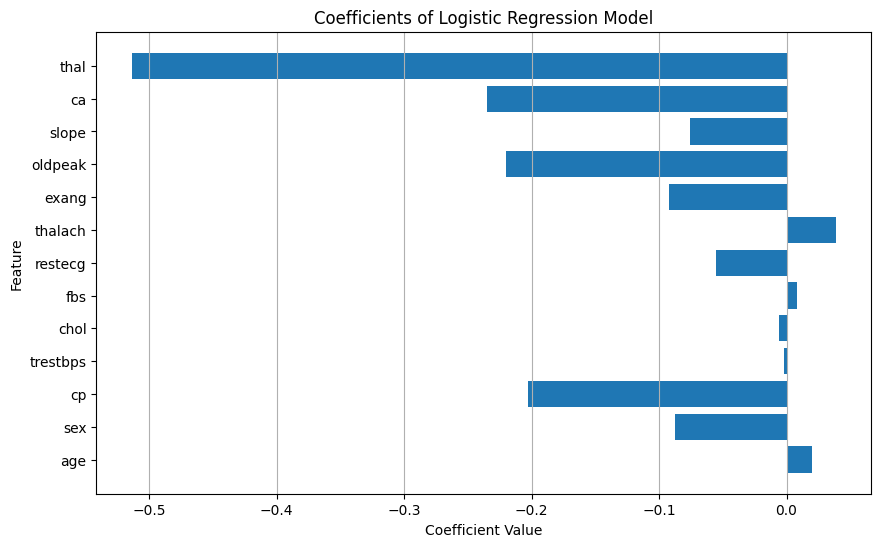

In [32]:
names = list(df.columns)
names
import matplotlib.pyplot as plt

coefficients = log_model.coef_[0]
feature_names = X_train.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.grid(axis='x')
plt.show()


In [34]:
# Evaluate the model on the test set
accuracy = log_model.score(X_test_imputed, Y_test)

print("Accuracy:", accuracy)


Accuracy: 0.5


confusion matrix, confusion tricia

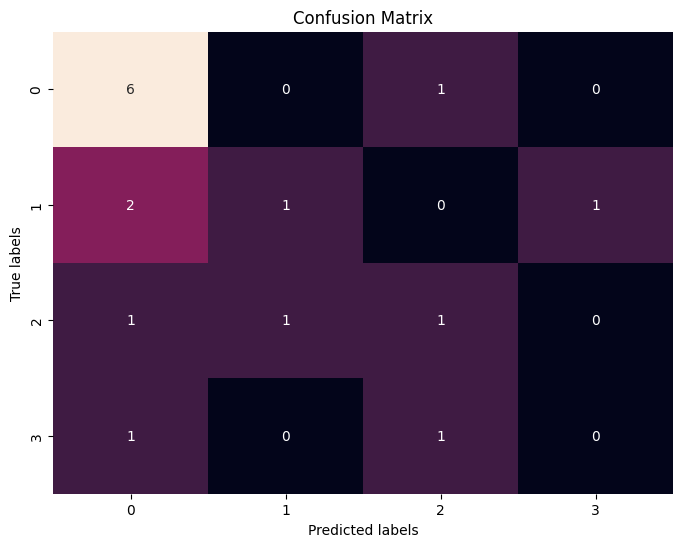

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.50      0.25      0.33         4
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         2

    accuracy                           0.50        16
   macro avg       0.36      0.36      0.34        16
weighted avg       0.45      0.50      0.45        16



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = log_model.predict(X_test_imputed)

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(Y_test, Y_pred))


In [42]:
confusion_matrix(Y_test,Y_pred)

array([[6, 0, 1, 0],
       [2, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 0, 1, 0]], dtype=int64)